<a href="https://colab.research.google.com/github/zfyer/mybatis-plus-doc/blob/master/Agent_Based_Simulation_of_COVID_19_Health_and_Economical_Effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing the package

In [24]:
!pip3 install git+https://github.com/petroniocandido/COVID19_AgentBasedSimulation.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/petroniocandido/COVID19_AgentBasedSimulation.git to /tmp/pip-req-build-j_3damd9
  Running command git clone -q https://github.com/petroniocandido/COVID19_AgentBasedSimulation.git /tmp/pip-req-build-j_3damd9


## Common imports

In [25]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import animation, rc
from IPython.display import HTML

warnings.simplefilter('ignore')

## Simulations

# Agent Based Simulation of COVID-19 Health and Economical Effects 基于代理的 COVID-19 健康和经济影响模拟

Prof. Dr. Petrônio Cândido de Lima e Silva <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (petronio.candido@ifnmg.edu.br)


<img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-nc-sa.svg" alt="Creative Commons BY-NC-SA" />

Experiments for the post published on Towards Data Science, available at https://towardsdatascience.com/agent-based-simulation-of-covid-19-health-and-economical-effects-6aa4ae0ff397.


### Scenario 1 - Do Nothing

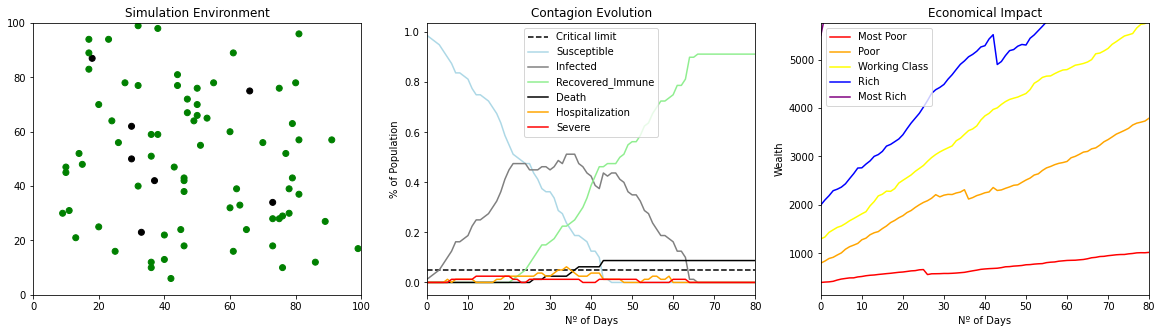

In [26]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    # Percentage of infected in initial population
    initial_infected_perc = 0.02,
    # Percentage of immune in initial population
    initial_immune_perc = 0.01,
    # Length of simulation environment       
    length=100,                       
    # Height of simulation environment
    height=100,
    # Size of population
    population_size=80,
    # Minimal distance between agents for contagion
    contagion_distance=5.,                
    # Maximum percentage of population which Healthcare System can handle simutaneously
    critical_limit=0.05,
    # Mobility ranges for agents, by Status
    amplitudes = {                        
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        }
)

anim = execute_simulation(sim, iterations=80)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim

#save_gif(anim, 'do_nothing.gif')

In [27]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 80, "scenario1.csv",
                 # Percentage of infected in initial population
                 initial_infected_perc=0.02,
                 # Percentage of immune in initial population
                 initial_immune_perc=0.01,
                 # Length of simulation environment
                 length=100,
                 # Height of simulation environment
                 height=100,
                 # Size of population
                 population_size=80,
                 # Minimal distance between agents for contagion
                 contagion_distance=5.,
                 # Maximum percentage of population which Healthcare System can handle simutaneously
                 critical_limit=0.05,
                 # Mobility ranges for agents, by Status
                 amplitudes={
                     Status.Susceptible: 5,
                     Status.Recovered_Immune: 5,
                     Status.Infected: 5
                 }
                 )

Iteration            Metric           Min           Avg          Std  \
0            0       Susceptible      0.925000      0.979000     0.013332   
1            0          Infected      0.012500      0.021000     0.013332   
2            0  Recovered_Immune      0.000000      0.000000     0.000000   
3            0             Death      0.000000      0.000000     0.000000   
4            0      Asymptomatic      1.000000      1.000000     0.000000   
..         ...               ...           ...           ...          ...   
955         79                Q1    736.234166   1837.339338   540.547597   
956         79                Q2   1710.118289   3607.018761   967.068207   
957         79                Q3   3302.112512   5577.954365  1334.097429   
958         79                Q4   4612.375262   8586.494240  2272.590345   
959         79                Q5  12173.392345  24981.507723  5228.688049   

              Max  
0        0.987500  
1        0.075000  
2        0.000000  
3        0.000000  
4        1.000000  
..            ...  
955   3122.242112  
956   5940.894593  
957   8853.453980  
958  13975.480924  
959  36362.729686  

[960 rows x 6 columns]

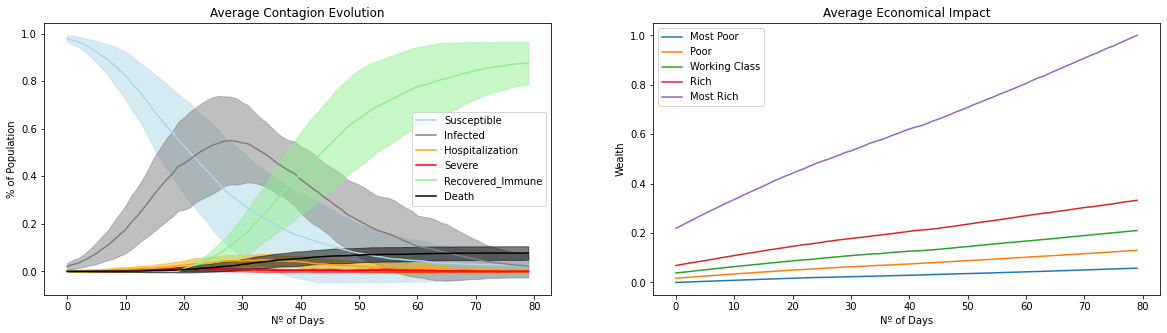

In [28]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario1.csv')

plot_batch_results(df)

### Scenario 2 - Restrict the mobility only for infected people

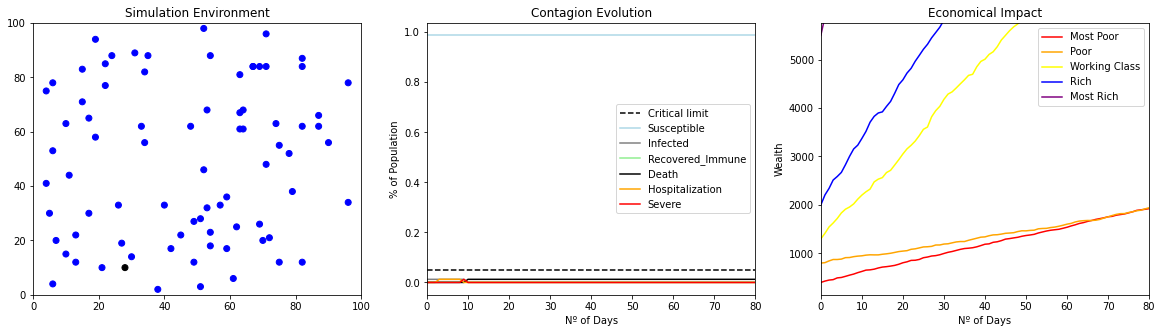

In [29]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    # Percentage of infected in initial population
    initial_infected_perc = 0.02,
    # Percentage of immune in initial population
    initial_immune_perc = 0.01,
    # Length of simulation environment       
    length=100,                       
    # Height of simulation environment
    height=100,
    # Size of population
    population_size=80,
    # Minimal distance between agents for contagion
    contagion_distance=5.,                
    # Maximum percentage of population which Healthcare System can handle simutaneously
    critical_limit=0.05,
    # Mobility ranges for agents, by Status
    amplitudes = {                        
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 0
        }
)

anim = execute_simulation(sim, iterations=80)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim

#save_gif(anim, 'do_nothing.gif')

In [30]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 80, "scenario2.csv",
                 # Percentage of infected in initial population
                 initial_infected_perc=0.02,
                 # Percentage of immune in initial population
                 initial_immune_perc=0.01,
                 # Length of simulation environment
                 length=100,
                 # Height of simulation environment
                 height=100,
                 # Size of population
                 population_size=80,
                 # Minimal distance between agents for contagion
                 contagion_distance=5.,
                 # Maximum percentage of population which Healthcare System can handle simutaneously
                 critical_limit=0.05,
                 # Mobility ranges for agents, by Status
                 amplitudes={
                     Status.Susceptible: 5,
                     Status.Recovered_Immune: 5,
                     Status.Infected: 0
                 }
                 )

Iteration            Metric           Min           Avg          Std  \
0            0       Susceptible      0.937500      0.977500     0.013919   
1            0          Infected      0.012500      0.022500     0.013919   
2            0  Recovered_Immune      0.000000      0.000000     0.000000   
3            0             Death      0.000000      0.000000     0.000000   
4            0      Asymptomatic      0.987500      0.999750     0.001750   
..         ...               ...           ...           ...          ...   
955         79                Q1    558.292424   1865.437256   430.490346   
956         79                Q2   2022.098752   3620.745011   732.657871   
957         79                Q3   2259.711248   5745.689594  1465.319471   
958         79                Q4   4853.765305   8897.472137  2322.538968   
959         79                Q5  13545.973566  24343.414630  5212.675289   

              Max  
0        0.987500  
1        0.062500  
2        0.000000  
3        0.000000  
4        1.000000  
..            ...  
955   2786.050078  
956   5682.306968  
957   8804.540803  
958  15052.168072  
959  36138.885250  

[960 rows x 6 columns]

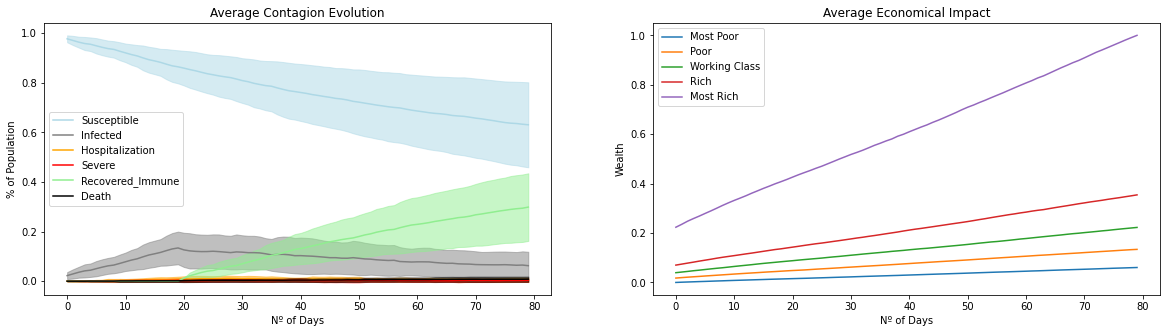

In [31]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario2.csv')

plot_batch_results(df)

### Scenario 3 - Lockdown (restrict the mobility for everybody )

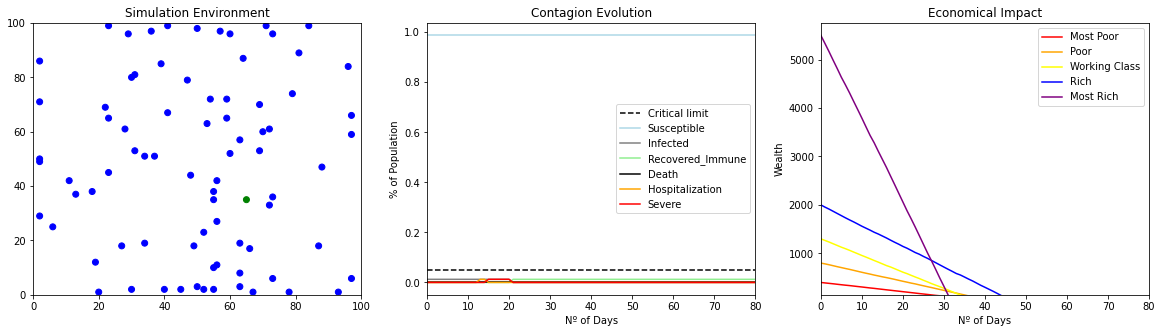

In [32]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    # Percentage of infected in initial population
    initial_infected_perc = 0.02,
    # Percentage of immune in initial population
    initial_immune_perc = 0.01,
    # Length of simulation environment       
    length=100,                       
    # Height of simulation environment
    height=100,
    # Size of population
    population_size=80,
    # Minimal distance between agents for contagion
    contagion_distance=5.,                
    # Maximum percentage of population which Healthcare System can handle simutaneously
    critical_limit=0.05,
    # Mobility ranges for agents, by Status
    amplitudes = {                        
        Status.Susceptible : 0.5, 
        Status.Recovered_Immune : 0.5, 
        Status.Infected : 0
        }
)

anim = execute_simulation(sim, iterations=80)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim

#save_gif(anim, 'do_nothing.gif')

In [33]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 80, "scenario3.csv",
                 # Percentage of infected in initial population
                 initial_infected_perc=0.02,
                 # Percentage of immune in initial population
                 initial_immune_perc=0.01,
                 # Length of simulation environment
                 length=100,
                 # Height of simulation environment
                 height=100,
                 # Size of population
                 population_size=80,
                 # Minimal distance between agents for contagion
                 contagion_distance=5.,
                 # Maximum percentage of population which Healthcare System can handle simutaneously
                 critical_limit=0.05,
                 # Mobility ranges for agents, by Status
                 amplitudes={
                     Status.Susceptible: 0.5,
                     Status.Recovered_Immune: 0.5,
                     Status.Infected: 0
                 }
                 )

Iteration            Metric           Min          Avg          Std  \
0            0       Susceptible      0.937500     0.978000     0.012390   
1            0          Infected      0.012500     0.022000     0.012390   
2            0  Recovered_Immune      0.000000     0.000000     0.000000   
3            0             Death      0.000000     0.000000     0.000000   
4            0      Asymptomatic      0.987500     0.999750     0.001750   
..         ...               ...           ...          ...          ...   
955         79                Q1  -1201.310762  -447.715827   249.835276   
956         79                Q2  -2100.342613 -1007.389399   477.613346   
957         79                Q3  -3388.350986 -1460.241061   948.971821   
958         79                Q4  -4443.707208 -2058.529940  1117.390459   
959         79                Q5 -13523.783962 -5772.192922  3715.239451   

             Max  
0       0.987500  
1       0.062500  
2       0.000000  
3       0.000000  
4       1.000000  
..           ...  
955    16.552912  
956    44.154381  
957   816.794071  
958   859.308975  
959  3392.956379  

[960 rows x 6 columns]

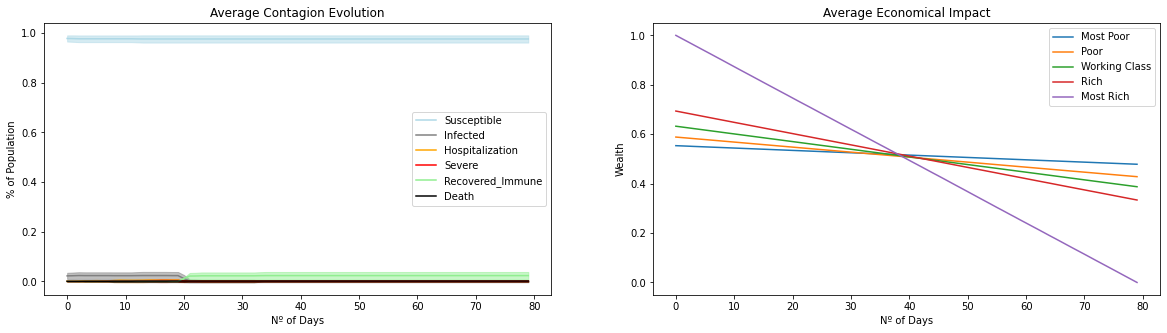

In [34]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario3.csv')

plot_batch_results(df)

### Scenario 4 - Restrict the mobility after 10% of the population being infected and release the restrictions when more then 95% is safe


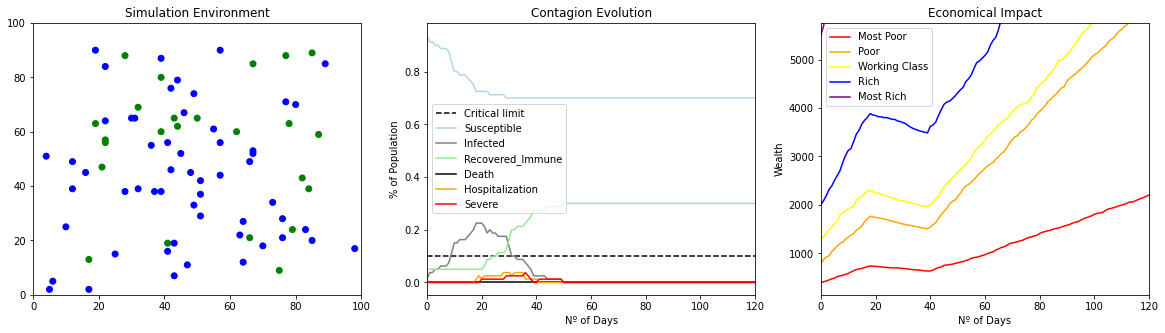

In [35]:
sim = Simulation(
    length=100,                          
    height=100,
    initial_infected_perc = 0.02,       
    population_size=80,                     
    contagion_distance=5,                
    critical_limit=.1,
    amplitudes = {                       
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        })

sim.append_trigger_simulation(lambda a : a.get_statistics()['Infected'] >= .2, 
                             'amplitudes', lambda a : {                       
        Status.Susceptible : 1.5, 
        Status.Recovered_Immune : 1.5, 
        Status.Infected : 1.5 
        } )

sim.append_trigger_simulation(lambda a : a.get_statistics()['Infected'] <= .05, 
                             'amplitudes', lambda a : {                       
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        } )


anim = execute_simulation(sim, iterations=120)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim


In [36]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 120, "scenario4.csv",
                 length=100,
                 height=100,
                 initial_infected_perc=0.02,
                 population_size=80,
                 contagion_distance=5,
                 critical_limit=.1,
                 amplitudes={
                     Status.Susceptible: 5,
                     Status.Recovered_Immune: 5,
                     Status.Infected: 5
                 },
                 triggers_simulation=[
                     {'condition': lambda a: a.get_statistics()['Infected'] >= .2,
                      'attribute': 'amplitudes',
                      'action': lambda a: {
                          Status.Susceptible: 1.5,
                          Status.Recovered_Immune: 1.5,
                          Status.Infected: 1.5
                      }},
                     {'condition': lambda a: a.get_statistics()['Infected'] <= .05,
                      'attribute': 'amplitudes',
                      'action': lambda a: {
                          Status.Susceptible: 5,
                          Status.Recovered_Immune: 5,
                          Status.Infected: 5
                      }}
                 ])


Iteration            Metric           Min           Avg           Std  \
0             0       Susceptible      0.900000      0.932500  9.013878e-03   
1             0          Infected      0.012500      0.017500  9.013878e-03   
2             0  Recovered_Immune      0.050000      0.050000  1.387779e-17   
3             0             Death      0.000000      0.000000  0.000000e+00   
4             0      Asymptomatic      1.000000      1.000000  0.000000e+00   
...         ...               ...           ...           ...           ...   
1435        119                Q1    838.172717   1753.053912  4.930764e+02   
1436        119                Q2   1525.499764   3452.067642  1.108370e+03   
1437        119                Q3   2311.446771   5244.724665  1.637343e+03   
1438        119                Q4   3573.509751   8460.089612  2.706067e+03   
1439        119                Q5  12662.615278  23280.917293  6.726522e+03   

               Max  
0         0.937500  
1         0.050000  
2         0.050000  
3         0.000000  
4         1.000000  
...            ...  
1435   3512.159227  
1436   5865.611705  
1437  10101.084246  
1438  17073.442463  
1439  41854.495210  

[1440 rows x 6 columns]

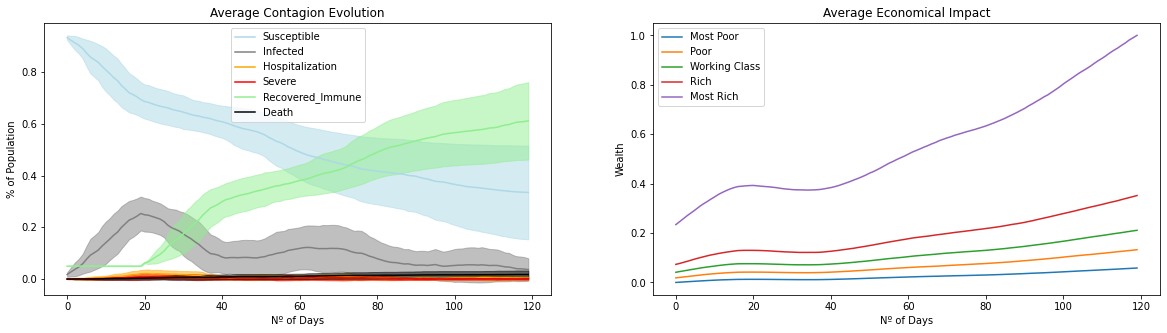

In [37]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario4.csv')

plot_batch_results(df)

### Scenario 5 - Controlled populations in contact with non-controlled populations

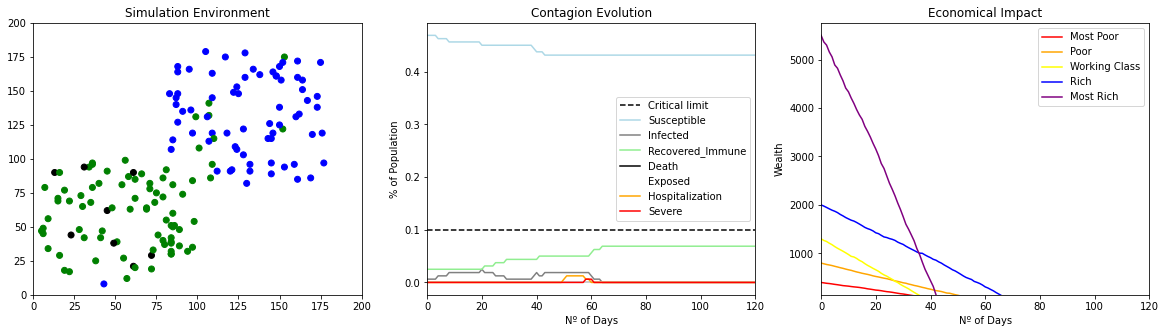

In [38]:
sim = MultiPopulationSimulation(
    length=200,                          # Largura do espaço de simulação
    height=200,
    contagion_distance=5.,
    critical_limit=.1,)

sim.append(Simulation(initial_infected_perc = 0.02,       
                     length=100,                          
                     height=100,                      
                     population_size=80,                     
                     contagion_distance=5.,                
                     critical_limit=.1,
    amplitudes = {                        
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        }), (0,0))
sim.append(Simulation(initial_infected_perc = 0.02,       
                     length=100,
    height=100,             
    population_size=80,            
    contagion_distance=5.,       
    critical_limit=.1,
    amplitudes = {               
        Status.Susceptible : 1, 
        Status.Recovered_Immune : 1, 
        Status.Infected : 1 
        }),(80,80))

anim = execute_simulation(sim, iterations=120)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim

In [39]:
from covid_abs.experiments import batch_experiment

sim1 = Simulation(initial_infected_perc=0.02,
                  length=100,
                  height=100,
                  population_size=80,
                  contagion_distance=5.,
                  critical_limit=.1,
                  amplitudes={
                      Status.Susceptible: 5,
                      Status.Recovered_Immune: 5,
                      Status.Infected: 5
                  })

sim2 = Simulation(initial_infected_perc=0.02,
                  length=100,
                  height=100,
                  population_size=80,
                  contagion_distance=5.,
                  critical_limit=.1,
                  amplitudes={
                      Status.Susceptible: 1,
                      Status.Recovered_Immune: 1,
                      Status.Infected: 1
                  })

batch_experiment(50, 80, "scenario5.csv", simulation_type=MultiPopulationSimulation,
                 length=200,
                 height=200,
                 contagion_distance=5.,
                 critical_limit=.1,
                 simulations=[sim1, sim2],
                 positions=[(0, 0), (80, 80)],
                 total_population=160
                 )

Iteration            Metric           Min           Avg           Std  \
0             0       Susceptible      0.412500      0.413625  7.875000e-03   
1             0          Infected      0.006250      0.006250  1.734723e-18   
2             0  Recovered_Immune      0.025000      0.839500  4.489944e-01   
3             0             Death      0.000000      0.006250  4.330127e-03   
4             0           Exposed      0.000000      0.000000  0.000000e+00   
...         ...               ...           ...           ...           ...   
1035         79                Q1  -2171.440161   -999.025359  6.298794e+02   
1036         79                Q2  -2795.056270  -1578.858083  6.469857e+02   
1037         79                Q3  -7331.505262  -4102.871094  1.967258e+03   
1038         79                Q4 -13350.608200  -6812.549500  3.657102e+03   
1039         79                Q5 -24623.056360 -14066.593707  6.647525e+03   

              Max  
0        0.468750  
1        0.006250  
2        1.600000  
3        0.012500  
4        0.000000  
...           ...  
1035    15.480052  
1036  -589.346337  
1037  -277.250492  
1038 -1370.919894  
1039 -2652.057188  

[1040 rows x 6 columns]

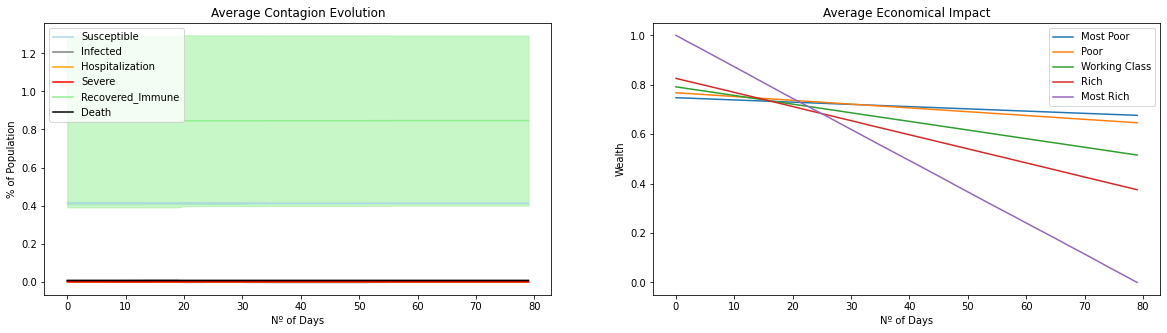

In [40]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario5.csv')

plot_batch_results(df)

### Scenario 6 - Vertical Isolation

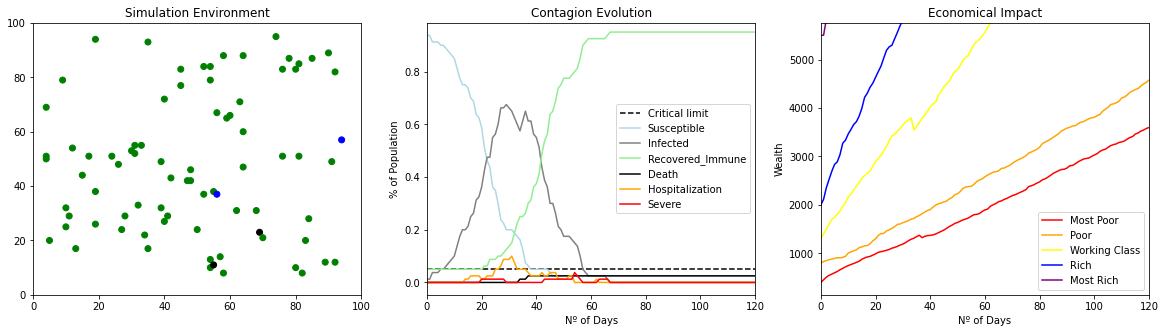

In [41]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    length=100,                          
    height=100,
    initial_infected_perc = 0.02,       
    population_size=80,                     
    contagion_distance=5,                
    critical_limit=.05,
    amplitudes = {                       
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        })

sim.append_trigger_population(lambda a : a.age >= 60, 
                             'move', lambda a : (a.x, a.y) )


anim = execute_simulation(sim, iterations=120)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim


In [42]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 80, "scenario6.csv",
                 length=100,                          
    height=100,
    initial_infected_perc = 0.02,       
    population_size=80,                     
    contagion_distance=5,                
    critical_limit=.05,
    amplitudes = {                       
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        },
        triggers_population=[
                     {'condition': lambda a : a.age >= 60,
                      'attribute': 'move',
                      'action': lambda a : (a.x, a.y) }]
                 )

Iteration            Metric                   Min                   Avg  \
0            0       Susceptible                0.8875               0.93075   
1            0          Infected                   0.0                 0.019   
2            0  Recovered_Immune                  0.05                  0.05   
3            0             Death                   0.0               0.00025   
4            0      Asymptomatic                0.9875                0.9995   
..         ...               ...                   ...                   ...   
955         79                Q1             581.16821  [1725.5400169103657]   
956         79                Q2           2332.891971  [3711.8057405129234]   
957         79                Q3           2577.584401   [5898.217960375055]   
958         79                Q4   [4365.941529599292]   [8563.447407101494]   
959         79                Q5  [11424.584746864448]  [24489.322297564442]   

                      Std                   Max  
0                0.010668                0.9375  
1                0.010966                0.0625  
2                     0.0                  0.05  
3                 0.00175                0.0125  
4                0.002449                   1.0  
..                    ...                   ...  
955  [463.93849833226597]             3109.1997  
956   [815.0362028128413]   [5910.121202668765]  
957  [1594.6539470523553]           9574.348284  
958  [1907.5065587393021]  [12505.346941051614]  
959    [6730.63177655578]          39324.934907  

[960 rows x 6 columns]

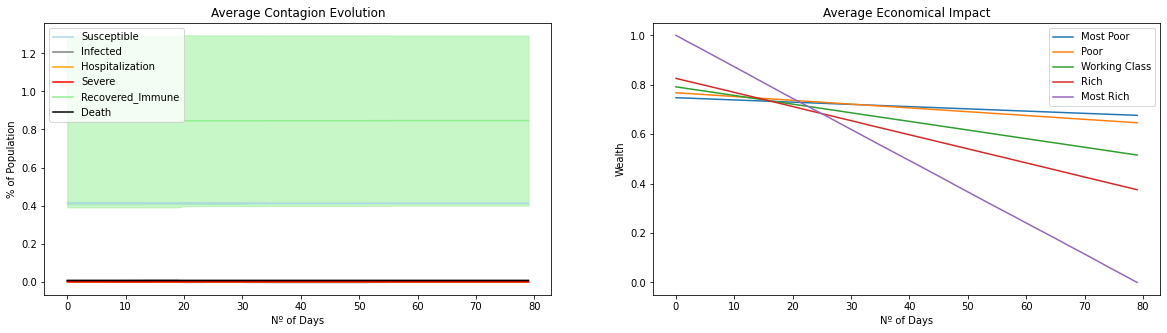

In [48]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario5.csv')

plot_batch_results(df)

### Scenario 7 - Masks for All

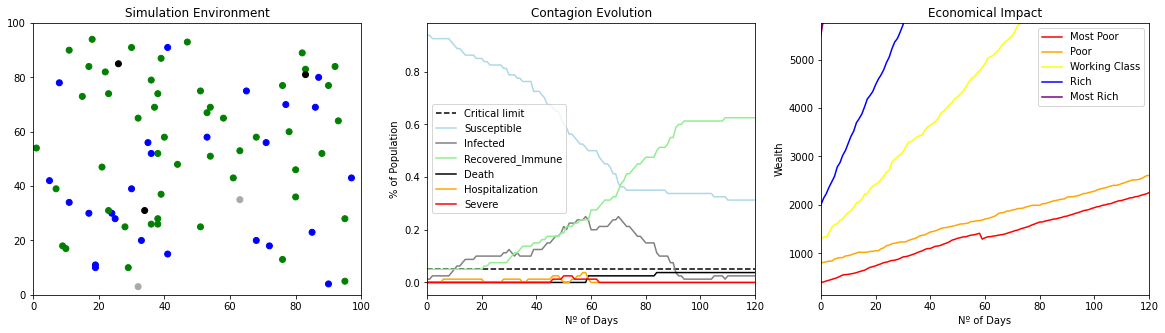

In [44]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    length=100,                          
    height=100,
    initial_infected_perc = 0.02,       
    population_size=80,                     
    contagion_distance=3,                
    critical_limit=.05,
    contagion_rate = .45, 
    amplitudes = {                       
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        })

anim = execute_simulation(sim, iterations=120)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim


In [45]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 80, "scenario7.csv",
                 length=100,                          
    height=100,
    initial_infected_perc = 0.02,       
    population_size=80,                     
    contagion_distance=3,                
    critical_limit=.05,
    contagion_rate = .45, 
    amplitudes = {                       
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        })

Iteration            Metric           Min           Avg           Std  \
0            0       Susceptible      0.912500      0.936500  4.213075e-03   
1            0          Infected      0.012500      0.013500  4.213075e-03   
2            0  Recovered_Immune      0.050000      0.050000  1.387779e-17   
3            0             Death      0.000000      0.000000  0.000000e+00   
4            0      Asymptomatic      0.987500      0.999750  1.750000e-03   
..         ...               ...           ...           ...           ...   
955         79                Q1   1133.791844   1902.293374  4.404632e+02   
956         79                Q2   2125.577936   3891.762638  8.178834e+02   
957         79                Q3   3292.578270   6568.725973  1.406903e+03   
958         79                Q4   4811.152292  10462.981574  2.535371e+03   
959         79                Q5  14932.876539  27902.646523  5.750099e+03   

              Max  
0        0.937500  
1        0.037500  
2        0.050000  
3        0.000000  
4        1.000000  
..            ...  
955   3230.350845  
956   5588.648557  
957   9424.308999  
958  15056.357087  
959  38330.214751  

[960 rows x 6 columns]

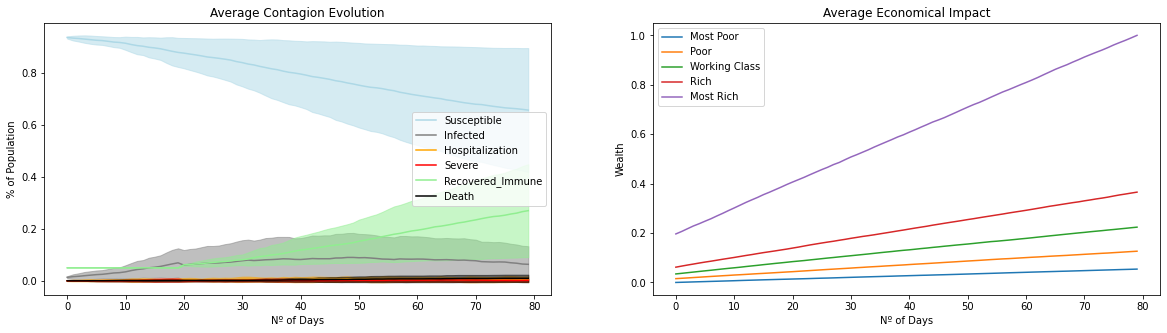

In [46]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario7.csv')

plot_batch_results(df)